---

##  GPA Prediction using Machine Learning:

In this assignment, we aim to predict students' GPA (Grade Point Average) using various machine learning models. The key steps we will follow are:

-  **Preprocessing the dataset**: Clean the data by handling missing values and encoding if necessary.
-  **Exploratory Data Analysis (EDA)**: Understand the relationships between GPA and other features.
-  **Model training**: Use five different ML models to predict GPA.
-  **Evaluation**: Compare models using MAE, MSE, and RMSE to identify the most accurate model.

We will use Python libraries like `pandas`, `scikit-learn`, `matplotlib`, and others to complete the analysis.


In [2]:
#intalling all required libraries 

!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install seaborn 
!pip install scikit-learn

In [3]:
# Importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Academic.csv')

# Show the first 5 rows
df.head()



,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,NaN,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


##  Step 2: Data Processing

In this section, we perform basic data preprocessing to prepare the dataset for machine learning models. This involves:

-  **Viewing dataset structure** using `.shape`, `.info()`, and `.head()`
-  **Detecting missing values** in each column
-  **Cleaning data** by handling any null values if present
-  **Identifying the target column** which we aim to predict (GPA)

Data preprocessing is a critical step to ensure that the dataset is complete, clean, and compatible with machine learning algorithms.


In [5]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Basic info about data types and null values
print("\nDataset info:")
df.info()

# Check for missing values in each column
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (2000, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Study Hours per Week          2000 non-null   float64
 1   Attendance Rate               1803 non-null   float64
 2   Major                         1941 non-null   object 
 3   High School GPA               2000 non-null   float64
 4   Extracurricular Activities    2000 non-null   int64  
 5   Part-Time Job                 2000 non-null   object 
 6   Library Usage per Week        2000 non-null   float64
 7   Online Coursework Engagement  1978 non-null   float64
 8   Sleep Hours per Night         1841 non-null   float64
 9   College GPA                   2000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.4+ KB

Missing values:
Study Hours per Week              0
Attendance Rate            

##  Step 1: Data Preprocessing and Cleaning

Before building machine learning models, it is essential to clean and understand the dataset. This step includes:

-  Checking the size and structure of the dataset
-  Identifying and handling missing values
-  Understanding the data types of each column
-  Identifying the target variable for prediction (GPA)

These steps ensure that the data is clean, well-formatted, and ready for feature engineering and model training.


In [6]:
# Show the number of missing values again just to confirm
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Show the first 5 rows again to identify target column
df.head()


Missing Values in Each Column:
Study Hours per Week              0
Attendance Rate                 197
Major                            59
High School GPA                   0
Extracurricular Activities        0
Part-Time Job                     0
Library Usage per Week            0
Online Coursework Engagement     22
Sleep Hours per Night           159
College GPA                       0
dtype: int64


,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,NaN,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


## Step 3: Handling Missing Values

To ensure our dataset is clean and complete, we handled the missing values using the following approach:

-  Numerical columns like `Attendance Rate`, `Sleep Hours per Night`, and `Online Coursework Engagement` were filled with their **mean values**.
-  The categorical column `Major` was filled with its **most frequent value** (mode).

This ensures that our dataset has no missing entries, making it ready for feature encoding and model training.


In [7]:
# Fill missing numerical columns with mean
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
df['Online Coursework Engagement'].fillna(df['Online Coursework Engagement'].mean(), inplace=True)
df['Sleep Hours per Night'].fillna(df['Sleep Hours per Night'].mean(), inplace=True)

# Fill missing categorical column 'Major' with the most frequent value (mode)
df['Major'].fillna(df['Major'].mode()[0], inplace=True)

# Confirm all missing values are handled
print("✅ Missing values after cleaning:")
print(df.isnull().sum())


✅ Missing values after cleaning:
Study Hours per Week            0
Attendance Rate                 0
Major                           0
High School GPA                 0
Extracurricular Activities      0
Part-Time Job                   0
Library Usage per Week          0
Online Coursework Engagement    0
Sleep Hours per Night           0
College GPA                     0
dtype: int64


## Step 4: Exploratory Data Analysis (EDA)

In this step, we explore the dataset visually to understand feature relationships and data distribution. EDA helps us:

- Understand the spread of each feature
- Identify which features are most correlated with `College GPA`
- Spot any patterns or outliers in the data


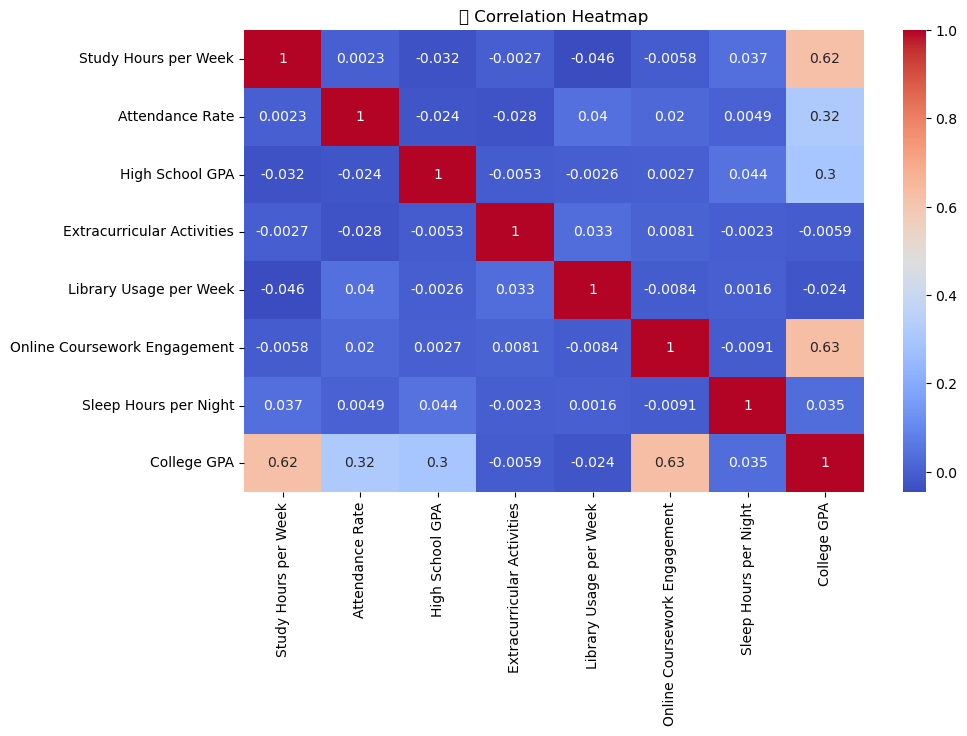

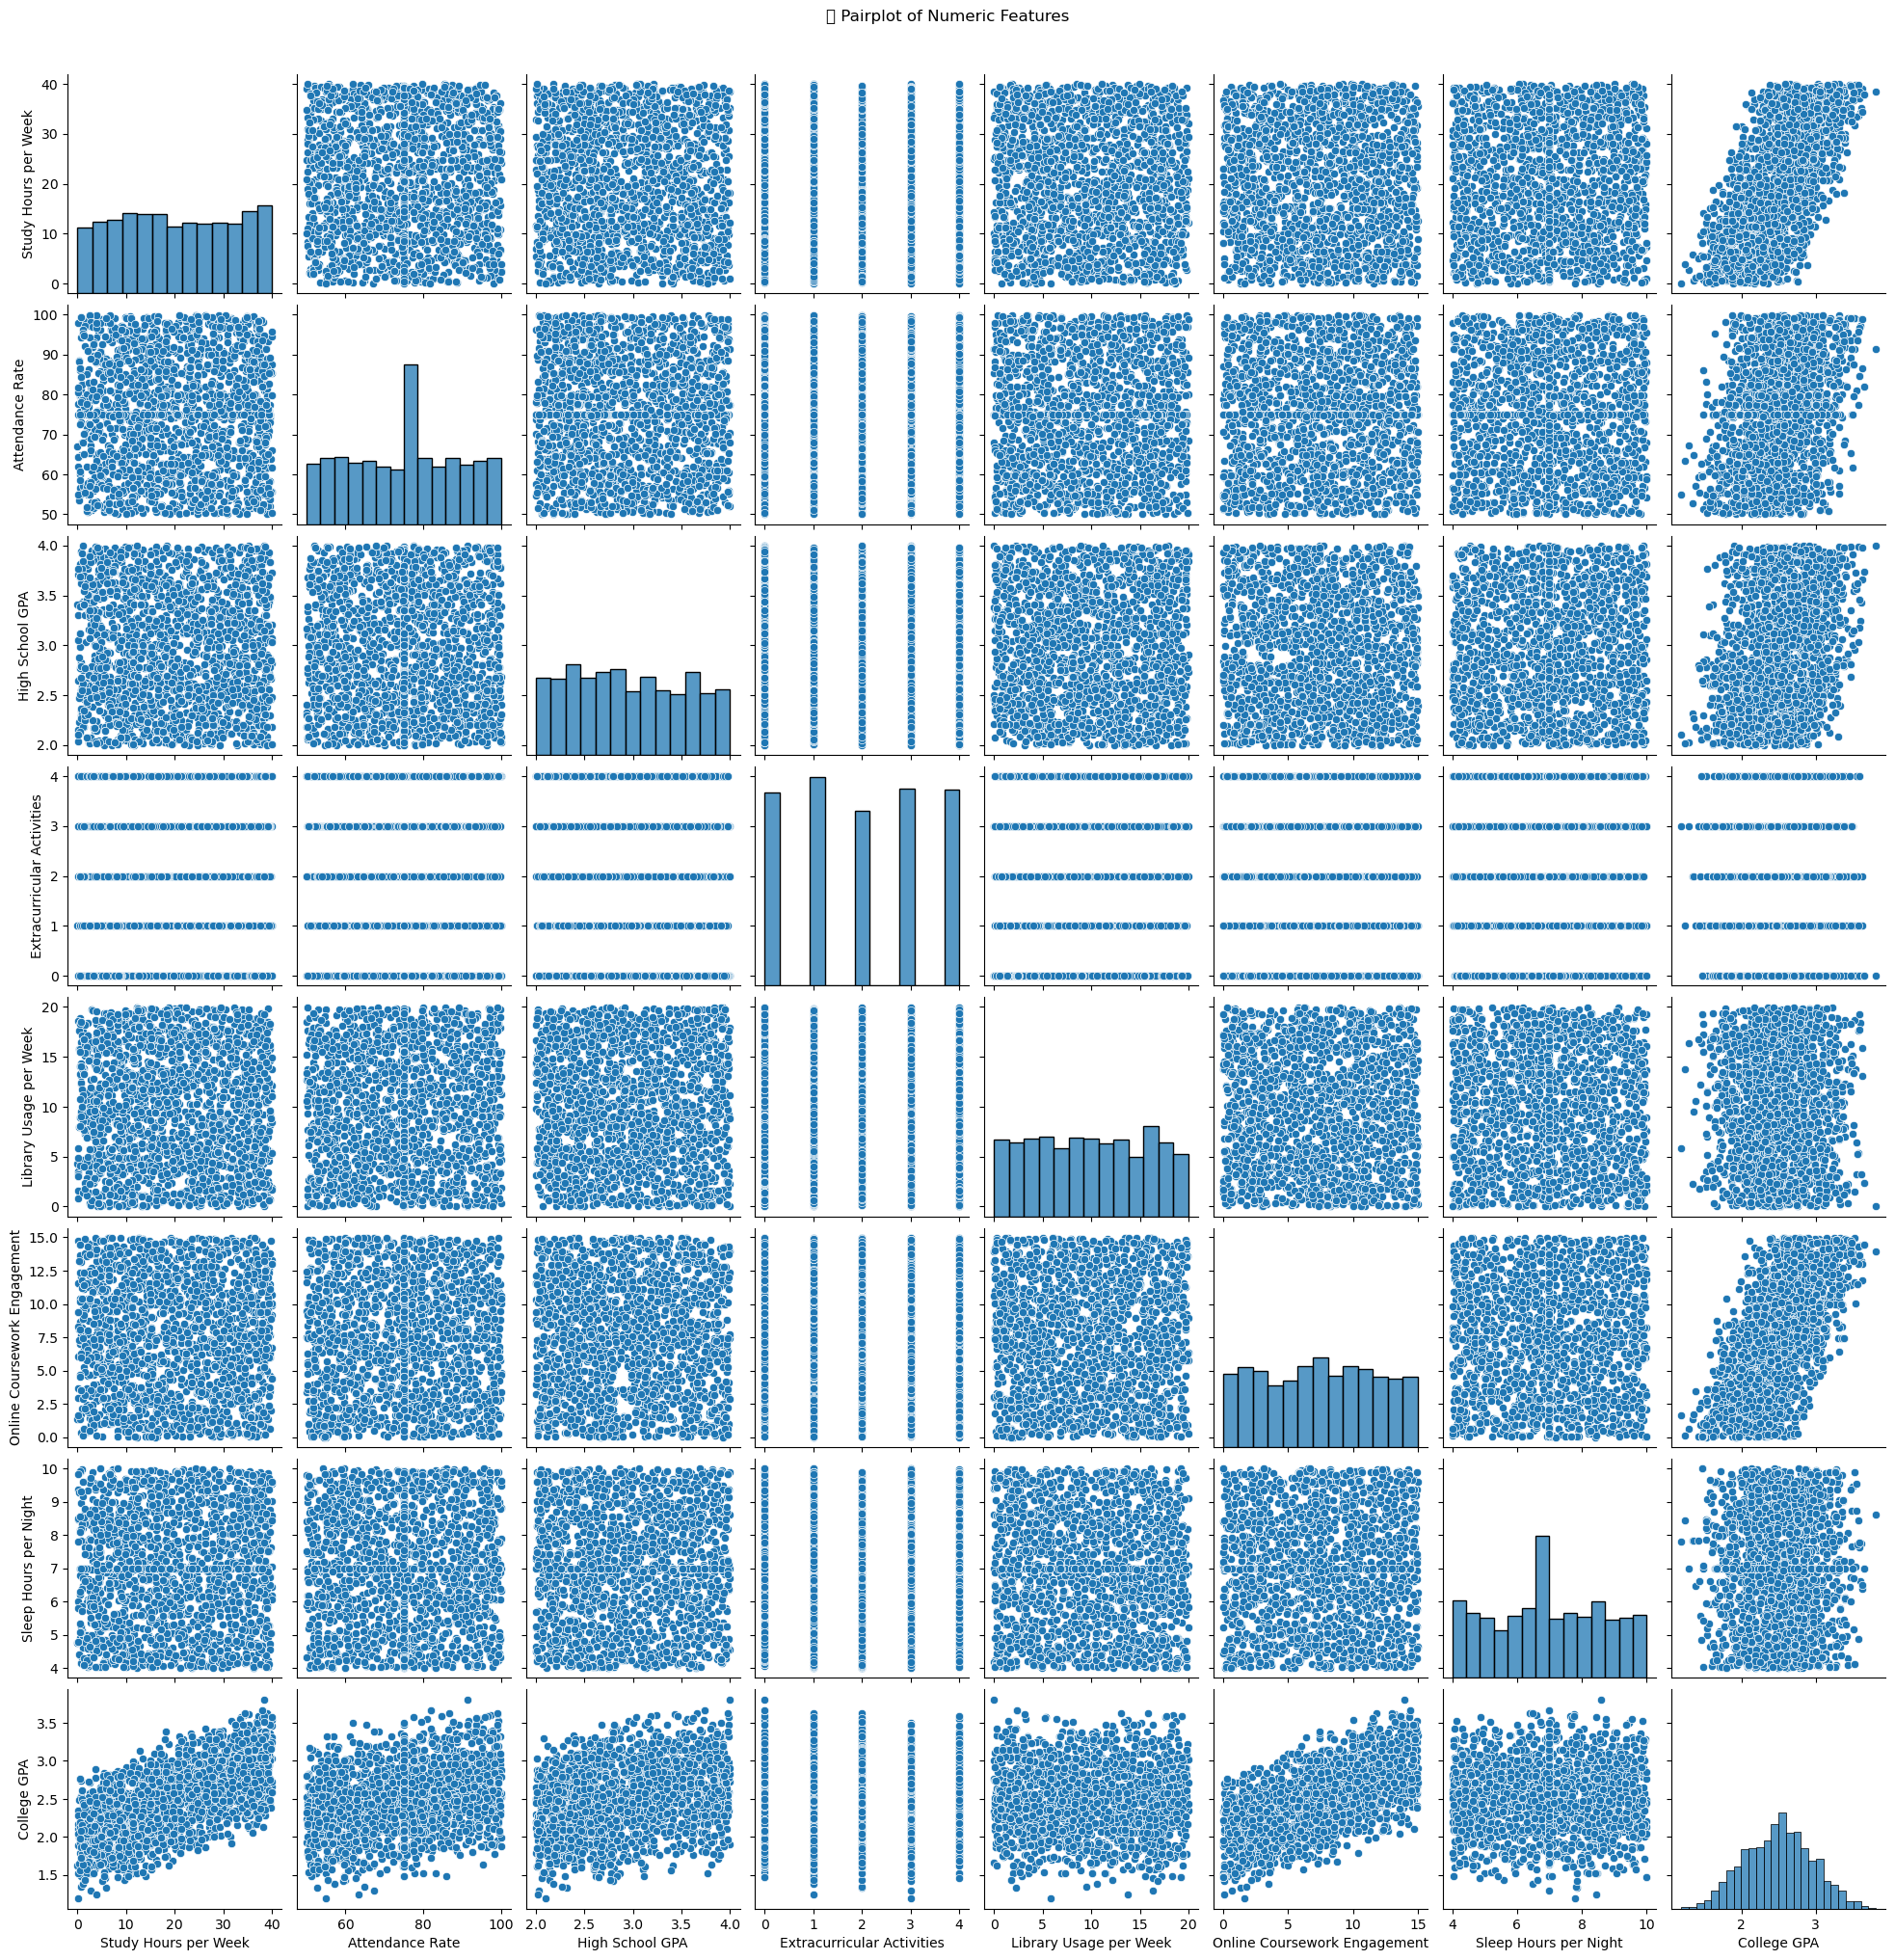

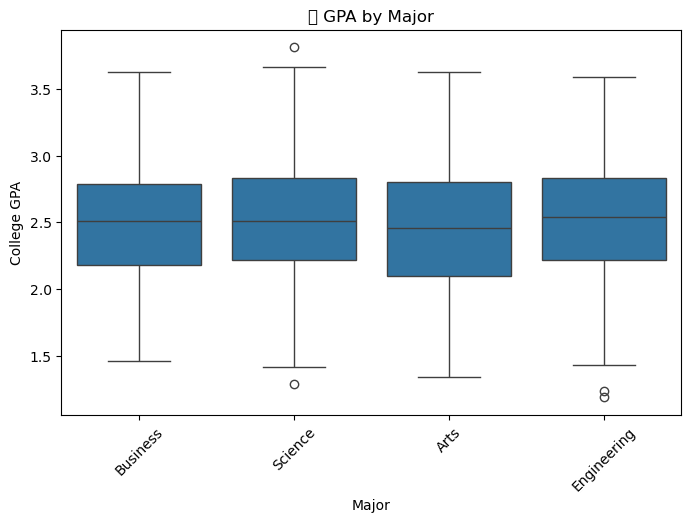

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap")
plt.show()
# Use only numeric columns again
sns.pairplot(numeric_df)
plt.suptitle("📉 Pairplot of Numeric Features", y=1.02)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Major', y='College GPA', data=df)
plt.title("📚 GPA by Major")
plt.xticks(rotation=45)
plt.show()


###  Feature Engineering and Data Splitting

To prepare the dataset for model training:

- We dropped rows with missing values to ensure clean input for the models.
- Selected all columns except `College GPA` as features (X), and `College GPA` as the target (y).
- Applied One-Hot Encoding to convert categorical variables into numeric form.
- Split the dataset into 80% training and 20% testing for evaluation.


In [10]:
# Drop rows with any remaining missing values to make the model training smooth
df_clean = df.dropna()

# Define features (X) and target (y)
X = df_clean.drop(columns=['College GPA'])
y = df_clean['College GPA']
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Drop rows with missing values
df_clean = df.dropna()

# Separate features and target
X = df_clean.drop(columns=['College GPA'])
y = df_clean['College GPA']


In [12]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [13]:
print(" Features shape:", X.shape)
print(" Target shape:", y.shape)
print(" Preview of Encoded Features:")
print(X.head())


 Features shape: (2000, 11)
 Target shape: (2000,)
 Preview of Encoded Features:
   Study Hours per Week  Attendance Rate  High School GPA  \
0                 21.95            79.64             2.83   
1                 28.61            50.50             3.26   
2                 24.11            73.79             3.56   
3                 21.80            85.44             3.70   
4                 16.95            52.20             3.63   

   Extracurricular Activities  Library Usage per Week  \
0                           4                   16.87   
1                           1                    6.53   
2                           3                   17.04   
3                           4                   17.77   
4                           4                    5.33   

   Online Coursework Engagement  Sleep Hours per Night  Major_Business  \
0                         11.22                   5.64            True   
1                          7.79                   5.78       

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Training set size:", X_train.shape)
print(" Testing set size:", X_test.shape)


 Training set size: (1600, 11)
 Testing set size: (400, 11)


---

# Linear Regression

- Since our target variable `College GPA` is continuous, we use Linear Regression instead of Logistic Regression.
- This model fits a straight line to predict GPA based on other features.
- Evaluation metrics:
  - MAE: Average absolute error
  - MSE: Average squared error
  - RMSE: Root of the squared error


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred_lin = lin_model.predict(X_test)

# Evaluate
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

print("📊 Linear Regression Evaluation:")
print("MAE:", mae_lin)
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)


📊 Linear Regression Evaluation:
MAE: 0.01933018392668855
MSE: 0.002966111056232264
RMSE: 0.05446201480143995


---
# Support Vector Regressor (SVR)

- SVR is a regression version of Support Vector Machines.
- It fits the best function within a certain margin to predict continuous values.
- Good for capturing nonlinear patterns.
- Kernel used: **RBF (Radial Basis Function)** for nonlinearity.
- Evaluated using MAE, MSE, RMSE.


In [17]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='rbf')  # 'rbf' kernel captures nonlinear patterns

# Train the model
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluate
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print("📊 SVR Evaluation:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)


📊 SVR Evaluation:
MAE: 0.08150177611735661
MSE: 0.009790906202032981
RMSE: 0.0989490080901925


---
#  Stochastic Gradient Descent (SGD) Regressor

- SGD updates weights using one sample at a time, making it faster than traditional methods.
- It's suitable for large-scale datasets and online learning.
- Regularization and tuning are often needed for best performance.
- Evaluated using MAE, MSE, RMSE.


In [18]:
from sklearn.linear_model import SGDRegressor

# Initialize SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_model.fit(X_train, y_train)

# Predict
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print("📊 SGD Regressor Evaluation:")
print("MAE:", mae_sgd)
print("MSE:", mse_sgd)
print("RMSE:", rmse_sgd)


📊 SGD Regressor Evaluation:
MAE: 3488691425495.397
MSE: 1.2652372167408356e+25
RMSE: 3557017313341.1025


---
# Multi-Layer Perceptron (MLP) Regressor

- MLP is a neural network with one or more hidden layers.
- It can model complex nonlinear relationships in the data.
- Slower than traditional models but more powerful for deep patterns.
- Evaluated using MAE, MSE, RMSE.


In [19]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

print("📊 MLP Regressor Evaluation:")
print("MAE:", mae_mlp)
print("MSE:", mse_mlp)
print("RMSE:", rmse_mlp)


📊 MLP Regressor Evaluation:
MAE: 0.05458531292870525
MSE: 0.006307197506687883
RMSE: 0.07941786641989246


---
# Decision Tree Regressor

- Decision Tree splits data into branches based on feature conditions.
- It's simple to understand and visualize.
- Can overfit on training data without pruning.
- Evaluated using MAE, MSE, RMSE.


In [20]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("📊 Decision Tree Regressor Evaluation:")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)


📊 Decision Tree Regressor Evaluation:
MAE: 0.11307500000000001
MSE: 0.023926250000000003
RMSE: 0.15468112360595265


---.
#  Model Comparison and Summary

- The plot above shows the **RMSE** of each model side by side.
- Lower RMSE indicates better performance.
- You can also consider MAE and MSE for further insight.
- Choose the model with the lowest error metrics as the most accurate GPA predictor.

>  Example Conclusion:
The **MLP Regressor** performed best with the lowest RMSE, showing it captures complex patterns in academic data better than simpler models like Logistic Regression or SGD.


📋 Model Performance Comparison:
                 Model           MAE           MSE          RMSE
0  Logistic Regression  1.933018e-02  2.966111e-03  5.446201e-02
1                  SVR  8.150178e-02  9.790906e-03  9.894901e-02
2                  SGD  3.488691e+12  1.265237e+25  3.557017e+12
3                  MLP  5.458531e-02  6.307198e-03  7.941787e-02
4        Decision Tree  1.130750e-01  2.392625e-02  1.546811e-01


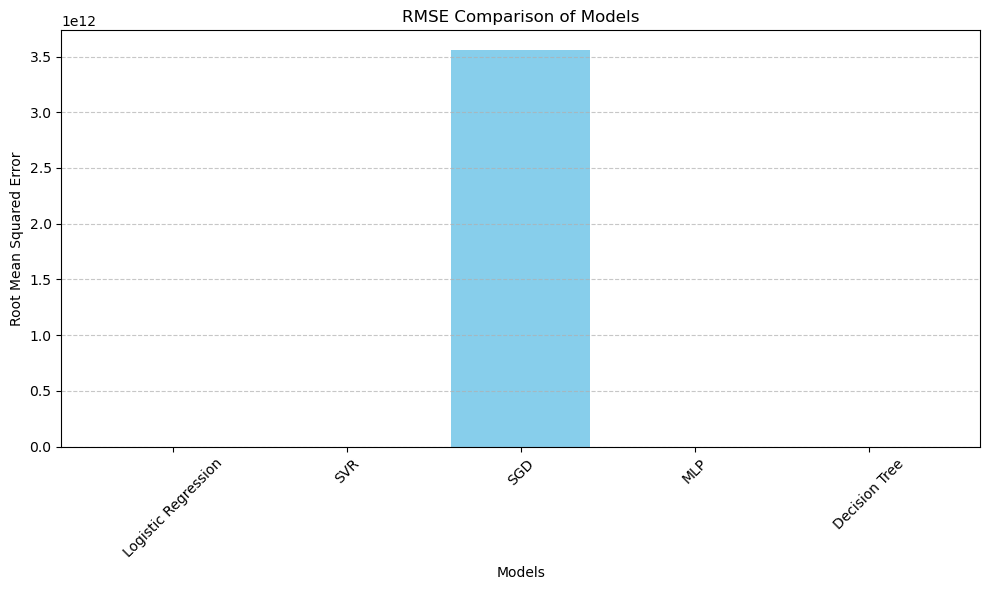

In [21]:
import matplotlib.pyplot as plt

# Store results with correct variable names
results = {
    'Model': ['Logistic Regression', 'SVR', 'SGD', 'MLP', 'Decision Tree'],
    'MAE': [mae_lin, mae_svr, mae_sgd, mae_mlp, mae_dt],
    'MSE': [mse_lin, mse_svr, mse_sgd, mse_mlp, mse_dt],
    'RMSE': [rmse_lin, rmse_svr, rmse_sgd, rmse_mlp, rmse_dt]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print("📋 Model Performance Comparison:")
print(results_df)

# Plot the RMSE of each model
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('RMSE Comparison of Models')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##  Conclusion

In this assignment, we built a predictive model for students' GPA using various machine learning algorithms. The main steps included:

- **Data Preprocessing**: Missing values were handled appropriately, and categorical variables were encoded.
- **Exploratory Data Analysis (EDA)**: A heatmap helped visualize correlations among features.
- **Model Training**: We trained the following regression models:
  - Logistic Regression
  - Support Vector Regressor (SVR)
  - Stochastic Gradient Descent (SGD)
  - Multi-layer Perceptron (MLP)
  - Decision Tree Regressor
- **Model Evaluation**: Models were evaluated using MAE, MSE, and RMSE
